## Read in Packages

In [432]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import plotly.express as px
import seaborn as sns

# 1. Prediction question that can be answered with data and a machine learning model: Can we guess what position a player is in baseball using how he did in that season?

# 2. Collect data to answer your question via webscraping, APIs and/or combining several readily available dataset (i.e. kaggle, uci ML repo, etc.). 
### In this case I webscraped the MLB's website and used a loop to do it for the last 30 years which are all on different web-pages

In [90]:
page1 = pd.read_html("https://www.mlb.com/stats/regular-season")
url = "https://www.mlb.com/stats/regular-season?page=2"
mlb = pd.DataFrame()
while len(pd.read_html(url)[0])>0:
    mlb = pd.concat([mlb, pd.read_html(url)[0]])
    num = int(url[-1])
    num +=1
    url = url.replace(url[-1],str(num))
mlb = pd.concat([page1[0], mlb])
mlb["Year"] = 2020
mlb

PLAYER TEAM   G   AB   R   H  2B  3B  HR  RBI  \
0                1JuanJ SotoSotoLF1‌‌‌  WSH  47  154  39  54  14   0  13   37   
1       2FreddieF FreemanFreeman1B2‌‌‌  ATL  60  214  51  73  23   1  13   53   
2           3MarcellM OzunaOzunaDH3‌‌‌  ATL  60  228  38  77  14   0  18   56   
3          4DJD LeMahieuLeMahieu2B4‌‌‌  NYY  50  195  41  71  10   2  10   27   
4          5JoseJ RamírezRamirez3B5‌‌‌  CLE  58  219  45  64  16   1  17   46   
..                                 ...  ...  ..  ...  ..  ..  ..  ..  ..  ...   
12  138EduardoE EscobarEscobar3B138‌‌‌  ARI  54  203  22  43   7   3   4   20   
13         139JavierJ BáezBaezSS139‌‌‌  CHC  59  222  27  45   9   1   8   24   
14         140EvanE WhiteWhite1B140‌‌‌  SEA  54  182  19  32   7   0   8   26   
15   141JonathanJ VillarVillar2B141‌‌‌  TOR  52  185  13  43   5   0   2   15   
16        142NickyN LopezLopez2B142‌‌‌   KC  56  169  15  34   8   0   1   13   

    BB  SO  SB  CS    AVG    OBP    SLG  caret-upcaret-downOPS  Year  
0   41  28   6   2  0.351  0.490  0.695                  1.185  2020  
1   45  37   2   0  0.341  0.462  0.640                  1.102  2020  
2   38  60   0   0  0.338  0.431  0.636                  1.067  2020  
3   18  21   3   0  0.364  0.421  0.590                  1.011  2020  
4   31  43  10   3  0.292  0.386  0.607                  0.993  2020  
..  ..  ..  ..  ..    ...    ...    ...                    ...   ...  
12  15  41   1   0  0.212  0.270  0.335                  0.605  2020  
13   7  75   3   0  0.203  0.238  0.360                  0.599  2020  
14  18  84   1   2  0.176  0.252  0.346                  0.599  2020  
15  19  54  16   5  0.232  0.301  0.292                  0.593  2020  
16  18  41   0   5  0.201  0.286  0.266                  0.552  2020  

[142 rows x 19 columns]

In [91]:
"https://www.mlb.com/stats/2019/regular-season"

years = np.arange(1990,2020)

for year in years:
    page1 = pd.read_html("https://www.mlb.com/stats/"+str(year)+"/regular-season")
    page1 = page1[0]
    page1["Year"] = year
    url = "https://www.mlb.com/stats/"+str(year)+"?page=2"
    test = pd.DataFrame()
    while len(pd.read_html(url)[0])>0:
        test = pd.concat([test, pd.read_html(url)[0]])
        num = int(url[-1])
        num +=1
        url = url.replace(url[-1],str(num))
    test["Year"] = year
    test = pd.concat([page1,test])
    mlb = pd.concat([mlb,test])
    
    
#https://www.mlb.com/stats/2019?page=2

In [5]:
mlb

PLAYER TEAM   G   AB   R   H  2B  3B  HR  RBI  \
0                1JuanJ SotoSotoLF1‌‌‌  WSH  47  154  39  54  14   0  13   37   
1       2FreddieF FreemanFreeman1B2‌‌‌  ATL  60  214  51  73  23   1  13   53   
2           3MarcellM OzunaOzunaDH3‌‌‌  ATL  60  228  38  77  14   0  18   56   
3          4DJD LeMahieuLeMahieu2B4‌‌‌  NYY  50  195  41  71  10   2  10   27   
4          5JoseJ RamírezRamirez3B5‌‌‌  CLE  58  219  45  64  16   1  17   46   
..                                 ...  ...  ..  ...  ..  ..  ..  ..  ..  ...   
12  138EduardoE EscobarEscobar3B138‌‌‌  ARI  54  203  22  43   7   3   4   20   
13         139JavierJ BáezBaezSS139‌‌‌  CHC  59  222  27  45   9   1   8   24   
14         140EvanE WhiteWhite1B140‌‌‌  SEA  54  182  19  32   7   0   8   26   
15   141JonathanJ VillarVillar2B141‌‌‌  TOR  52  185  13  43   5   0   2   15   
16        142NickyN LopezLopez2B142‌‌‌   KC  56  169  15  34   8   0   1   13   

    BB  SO  SB  CS    AVG    OBP    SLG  caret-upcaret-downOPS  Year  
0   41  28   6   2  0.351  0.490  0.695                  1.185  2020  
1   45  37   2   0  0.341  0.462  0.640                  1.102  2020  
2   38  60   0   0  0.338  0.431  0.636                  1.067  2020  
3   18  21   3   0  0.364  0.421  0.590                  1.011  2020  
4   31  43  10   3  0.292  0.386  0.607                  0.993  2020  
..  ..  ..  ..  ..    ...    ...    ...                    ...   ...  
12  15  41   1   0  0.212  0.270  0.335                  0.605  2019  
13   7  75   3   0  0.203  0.238  0.360                  0.599  2019  
14  18  84   1   2  0.176  0.252  0.346                  0.599  2019  
15  19  54  16   5  0.232  0.301  0.292                  0.593  2019  
16  18  41   0   5  0.201  0.286  0.266                  0.552  2019  

[4503 rows x 19 columns]

# 3. Clean / wrangle your data

In [93]:
player = []
for person in mlb["PLAYER"]:
    pattern = '(?<=[\d+])\D+(?=(?:[\d+]))'
    player.append(re.findall(pattern,person)[0])
    
mlb['PLAYER_updated'] = player

In [423]:
position = []
for person in mlb["PLAYER"]:
    pattern = '(?<=[a-z\.])[A-Z1-9][A-Z]|C(?=\d+)'
    position.append(re.findall(pattern,person)[0])
    
mlb['PLAYER_position'] = position

# 4. Create Features. I didn't create any features, because based on the data that I have I didn't think there was a baseball statistic that I could make up.

# 5. Explore the data through EDA

In [424]:
mlb

PLAYER TEAM   G   AB   R   H  2B  3B  HR  RBI  \
0                1JuanJ SotoSotoLF1‌‌‌  WSH  47  154  39  54  14   0  13   37   
1       2FreddieF FreemanFreeman1B2‌‌‌  ATL  60  214  51  73  23   1  13   53   
2           3MarcellM OzunaOzunaDH3‌‌‌  ATL  60  228  38  77  14   0  18   56   
3          4DJD LeMahieuLeMahieu2B4‌‌‌  NYY  50  195  41  71  10   2  10   27   
4          5JoseJ RamírezRamirez3B5‌‌‌  CLE  58  219  45  64  16   1  17   46   
..                                 ...  ...  ..  ...  ..  ..  ..  ..  ..  ...   
12  138EduardoE EscobarEscobar3B138‌‌‌  ARI  54  203  22  43   7   3   4   20   
13         139JavierJ BáezBaezSS139‌‌‌  CHC  59  222  27  45   9   1   8   24   
14         140EvanE WhiteWhite1B140‌‌‌  SEA  54  182  19  32   7   0   8   26   
15   141JonathanJ VillarVillar2B141‌‌‌  TOR  52  185  13  43   5   0   2   15   
16        142NickyN LopezLopez2B142‌‌‌   KC  56  169  15  34   8   0   1   13   

    ...  SO  SB  CS    AVG    OBP    SLG  caret-upcaret-downOPS  Year  \
0   ...  28   6   2  0.351  0.490  0.695                  1.185  2020   
1   ...  37   2   0  0.341  0.462  0.640                  1.102  2020   
2   ...  60   0   0  0.338  0.431  0.636                  1.067  2020   
3   ...  21   3   0  0.364  0.421  0.590                  1.011  2020   
4   ...  43  10   3  0.292  0.386  0.607                  0.993  2020   
..  ...  ..  ..  ..    ...    ...    ...                    ...   ...   
12  ...  41   1   0  0.212  0.270  0.335                  0.605  2019   
13  ...  75   3   0  0.203  0.238  0.360                  0.599  2019   
14  ...  84   1   2  0.176  0.252  0.346                  0.599  2019   
15  ...  54  16   5  0.232  0.301  0.292                  0.593  2019   
16  ...  41   0   5  0.201  0.286  0.266                  0.552  2019   

    PLAYER_position           PLAYER_updated  
0                LF         JuanJ SotoSotoLF  
1                1B  FreddieF FreemanFreeman  
2                DH    MarcellM OzunaOzunaDH  
3                2B     DJD LeMahieuLeMahieu  
4                3B     JoseJ RamírezRamirez  
..              ...                      ...  
12               3B  EduardoE EscobarEscobar  
13               SS       JavierJ BáezBaezSS  
14               1B         EvanE WhiteWhite  
15               2B   JonathanJ VillarVillar  
16               2B        NickyN LopezLopez  

[4428 rows x 21 columns]

In [425]:
mlb["PLAYER_position"].value_counts()

1B    723
3B    642
2B    530
SS    524
LF    487
CF    482
RF    459
DH    242
OF    171
C     168
Name: PLAYER_position, dtype: int64

In [434]:
mlb["Year"].value_counts()

1998    159
1999    157
1992    147
1996    147
1994    147
1995    147
1993    147
1997    144
2020    142
2001    142
2012    142
2016    142
2009    142
2008    142
2004    142
2000    142
2005    142
2019    142
2013    142
2017    142
2015    142
2002    142
2006    142
2010    142
2014    142
2018    142
2003    142
2007    142
2011    142
1990    128
1991    123
Name: Year, dtype: int64

In [429]:
px.box(mlb, x = "H", y = "PLAYER_position")

In [430]:
px.box(mlb, x = "SB", y = "PLAYER_position")

In [431]:
px.box(mlb.iloc[:,2:-4])

In [435]:
mlb.columns

Index(['PLAYER', 'TEAM', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB',
       'SO', 'SB', 'CS', 'AVG', 'OBP', 'SLG', 'caret-upcaret-downOPS', 'Year',
       'PLAYER_position', 'PLAYER_updated'],
      dtype='object')

In [436]:
mlb[['H', 'HR', 'RBI','SO', 'SB', 'CS', 'AVG', 'OBP', 'SLG', 'caret-upcaret-downOPS','PLAYER_position']]

H  HR  RBI  SO  SB  CS    AVG    OBP    SLG  caret-upcaret-downOPS  \
0   54  13   37  28   6   2  0.351  0.490  0.695                  1.185   
1   73  13   53  37   2   0  0.341  0.462  0.640                  1.102   
2   77  18   56  60   0   0  0.338  0.431  0.636                  1.067   
3   71  10   27  21   3   0  0.364  0.421  0.590                  1.011   
4   64  17   46  43  10   3  0.292  0.386  0.607                  0.993   
..  ..  ..  ...  ..  ..  ..    ...    ...    ...                    ...   
12  43   4   20  41   1   0  0.212  0.270  0.335                  0.605   
13  45   8   24  75   3   0  0.203  0.238  0.360                  0.599   
14  32   8   26  84   1   2  0.176  0.252  0.346                  0.599   
15  43   2   15  54  16   5  0.232  0.301  0.292                  0.593   
16  34   1   13  41   0   5  0.201  0.286  0.266                  0.552   

   PLAYER_position  
0               LF  
1               1B  
2               DH  
3               2B  
4               3B  
..             ...  
12              3B  
13              SS  
14              1B  
15              2B  
16              2B  

[4428 rows x 11 columns]

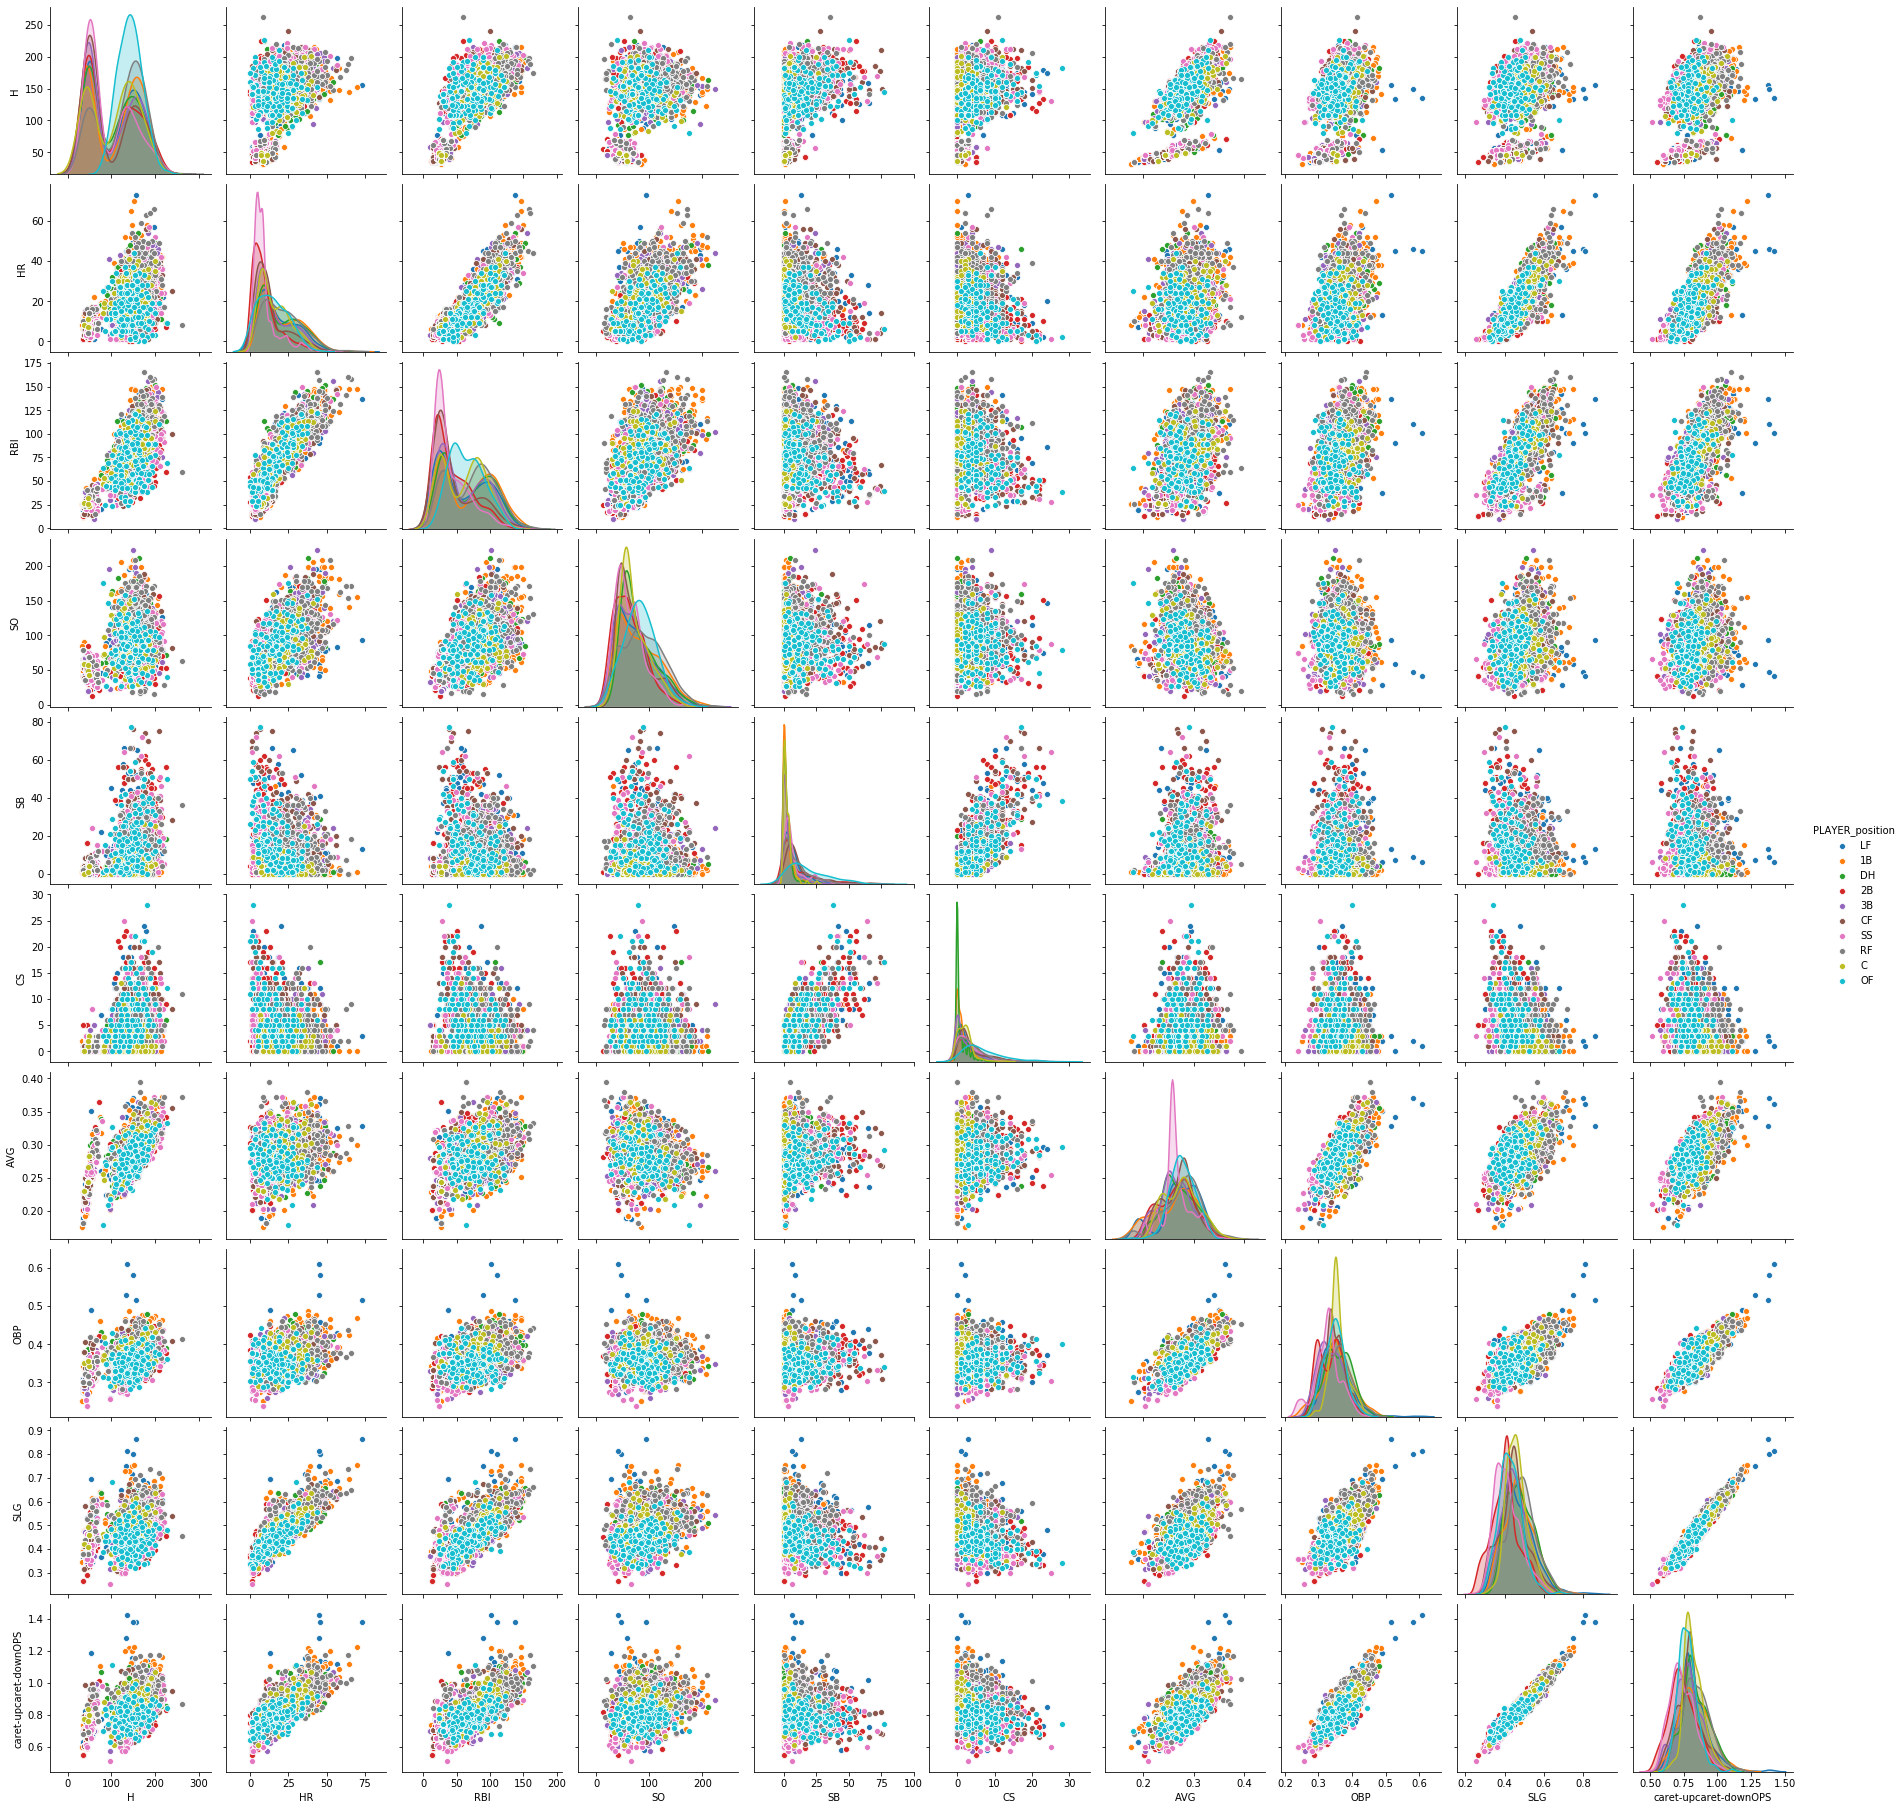

In [439]:
sns.pairplot(mlb[['H', 'HR', 'RBI','SO', 'SB', 'CS', 'AVG', 'OBP', 'SLG', 'caret-upcaret-downOPS', "PLAYER_position"]], hue = "PLAYER_position")

# 6. Analyze the data with multiple machine learning approaches

### I did this by first chaging each player position into numbers. Then I identified which columns were going to be my X variables. Using that information I split my data into train and test dataframes. I made sure to startify by player position so that I can have the same percentage of each position in the test as it is in the train

In [130]:
#Creating the dependent variable class
factor = pd.factorize(mlb['PLAYER_position'])
mlb.PLAYER_position = factor[0]
definitions = factor[1]
print(mlb.PLAYER_position.head())
print(definitions)

0    0
1    1
2    2
3    3
4    4
Name: PLAYER_position, dtype: int64
Index(['LF', '1B', 'DH', '2B', '3B', 'CF', 'SS', 'RF', 'C', 'OF'], dtype='object')


In [184]:
#Splitting the data into independent and dependent variables
X = mlb.iloc[:,2:-2]
y = mlb.iloc[:,-2]
X["Year"] = pd.Categorical(X.Year)

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21, stratify = mlb.PLAYER_position)

### I then made sure to scale each X variable

In [220]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7.  Evaluate each model. #6 and #7 are very similar and mix together. But from here I am trying all sorts of models and seeing which one fits best. I also hypertune a few of the models. I tried KNN, Decision Tree, Random Forest, Gradient Boost, Logisitic Regression, LinearSVC, and Gaussian Bayes

### First I tried KNN Classifier. This next cell is mostly commented out because it takes awhile to run. I have already run it so I am using the best parameters I found after hypertuning it when fitting my model.

In [332]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
#hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
#knn_2 = KNeighborsClassifier()
#Use GridSearch
#clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
#best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 1


In [333]:
knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 1, p = 1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=1,
                     weights='uniform')

### Here I was printing the classification report after fitting my model so I can know what the accuracy for KNN was. In this you will see that the accuracy is 64%

In [334]:
yhat_knn = knn.predict(X_test)
confusion_matrix(y_test, yhat_knn)
print(classification_report(y_test, yhat_knn))
#print(roc_auc_score(y_test.reset_index(drop = True), yhat_knn, multi_class = 'ovr'))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63       122
           1       0.65      0.66      0.66       181
           2       0.44      0.50      0.47        60
           3       0.66      0.70      0.68       133
           4       0.64      0.63      0.64       160
           5       0.80      0.77      0.78       120
           6       0.80      0.76      0.78       131
           7       0.52      0.52      0.52       115
           8       0.44      0.48      0.46        42
           9       0.56      0.44      0.49        43

    accuracy                           0.64      1107
   macro avg       0.61      0.61      0.61      1107
weighted avg       0.65      0.64      0.64      1107



### Decision Tree is the next one I tried. In the next two cells I was hypertuning my model so that I can find the best parameters. It also takes awhile so a lot of is commented out and the best parameters for my model is shown below.

In [300]:
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

splitter = ['best','random']
max_features = ["auto", "sqrt", "log2"]

In [302]:
#dt_pipe = Pipeline(
#    [('dt', DecisionTreeClassifier())])
#param_grid = [{'dt__max_features':max_features,
#              'dt__max_depth':max_depth,
#              'dt__min_samples_split':min_samples_split,
#              'dt__min_samples_leaf':min_samples_leaf,
#              'dt__splitter':splitter}]
#gs = GridSearchCV(dt_pipe, param_grid)
#gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('dt',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                                       

In [303]:
gs.best_params_

{'dt__max_depth': 80,
 'dt__max_features': 'auto',
 'dt__min_samples_leaf': 1,
 'dt__min_samples_split': 2,
 'dt__splitter': 'best'}

### After fitting my Decision Tree model I got an accuracy of 62%

In [443]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
yhat_dt = dt.predict(X_test)
print(classification_report(y_test, yhat_dt))

              precision    recall  f1-score   support

           0       0.54      0.57      0.55       122
           1       0.63      0.65      0.64       181
           2       0.46      0.47      0.46        60
           3       0.74      0.67      0.70       133
           4       0.66      0.64      0.65       160
           5       0.66      0.75      0.70       120
           6       0.77      0.73      0.75       131
           7       0.51      0.52      0.52       115
           8       0.45      0.43      0.44        42
           9       0.46      0.40      0.42        43

    accuracy                           0.62      1107
   macro avg       0.59      0.58      0.58      1107
weighted avg       0.62      0.62      0.62      1107



### The next one I tried was the Gradient Boost Model and after fitting it with the default parameters, I found that the accuracy was 16% which is very low and not worth doing any tuning with.

In [442]:
ac = AdaBoostClassifier()
ac.fit(X_train, y_train)
yhat_ac = ac.predict(X_test)
print(classification_report(y_test, yhat_ac))

              precision    recall  f1-score   support

           0       0.17      0.07      0.10       122
           1       0.32      0.31      0.31       181
           2       0.11      0.02      0.03        60
           3       0.28      0.13      0.18       133
           4       0.19      0.03      0.05       160
           5       0.21      0.16      0.18       120
           6       0.14      0.25      0.18       131
           7       0.29      0.05      0.09       115
           8       0.04      0.40      0.08        42
           9       0.20      0.26      0.22        43

    accuracy                           0.16      1107
   macro avg       0.20      0.17      0.14      1107
weighted avg       0.22      0.16      0.16      1107



### The next one I tried was a Logistic Regression Model that was specifically for a multi-class classification. I found that this one had a low accuracy as well because it was 24%

In [444]:
lr = LogisticRegressionCV(multi_class = 'ovr', solver = 'newton-cg')
lr.fit(X_train, y_train)
yhat_lr = lr.predict(X_test)
print(classification_report(y_test, yhat_lr))

              precision    recall  f1-score   support

           0       0.18      0.16      0.17       122
           1       0.29      0.73      0.41       181
           2       0.00      0.00      0.00        60
           3       0.29      0.65      0.40       133
           4       0.10      0.16      0.12       160
           5       0.00      0.00      0.00       120
           6       0.00      0.00      0.00       131
           7       0.00      0.00      0.00       115
           8       0.00      0.00      0.00        42
           9       0.00      0.00      0.00        43

    accuracy                           0.24      1107
   macro avg       0.09      0.17      0.11      1107
weighted avg       0.12      0.24      0.15      1107



C:\Users\bradi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### The next model that I tried was the Gaussian Naive Bayes model. Once I fit the model, I also found that this one had a low accuracy of 20%

In [445]:
gb = GaussianNB()
gb.fit(X_train, y_train)
yhat_gb = gb.predict(X_test)
print(classification_report(y_test, yhat_gb))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.35      0.27      0.30       181
           2       0.07      0.02      0.03        60
           3       0.46      0.05      0.08       133
           4       0.18      0.14      0.16       160
           5       0.25      0.01      0.02       120
           6       0.18      0.49      0.26       131
           7       0.22      0.37      0.27       115
           8       0.05      0.10      0.07        42
           9       0.16      0.74      0.27        43

    accuracy                           0.20      1107
   macro avg       0.19      0.22      0.15      1107
weighted avg       0.22      0.20      0.16      1107



### The next model that I tried was the LinearSVC model. Once I fit the model, I also found that this one had a low accuracy of 31%

In [446]:
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
yhat_lsvc = lsvc.predict(X_test)
print(classification_report(y_test, yhat_lsvc))

              precision    recall  f1-score   support

           0       0.36      0.04      0.07       122
           1       0.32      0.66      0.43       181
           2       0.00      0.00      0.00        60
           3       0.41      0.49      0.45       133
           4       0.25      0.24      0.24       160
           5       0.32      0.36      0.34       120
           6       0.29      0.41      0.34       131
           7       0.22      0.09      0.12       115
           8       0.20      0.02      0.04        42
           9       0.24      0.21      0.22        43

    accuracy                           0.31      1107
   macro avg       0.26      0.25      0.23      1107
weighted avg       0.29      0.31      0.27      1107



C:\Users\bradi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



### Random Forest is the next one I tried and it is the one I chose to use. In the next two cells I was hypertuning my model so that I can find the best parameters. It also takes awhile so a lot of is commented out and the best parameters for my model is shown below. The only one I do differently is the n_estimators parameter because it is best to have more, so when I ran the model, I instead had n_estimators=2000

In [281]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]

n_estimators = 100
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [284]:
#rf_pipe = Pipeline(
  #  [('rf', RandomForestClassifier())])
#param_grid = [{'rf__n_estimators': [100],
 #             'rf__max_features':max_features,
 #             'rf__max_depth':max_depth,
 #             'rf__min_samples_split':min_samples_split,
 #             'rf__min_samples_leaf':min_samples_leaf,
 #             'rf__bootstrap':bootstrap}]
#gs = GridSearchCV(rf_pipe, param_grid)
#gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                            

In [285]:
gs.best_params_

{'rf__bootstrap': False,
 'rf__max_depth': None,
 'rf__max_features': 'auto',
 'rf__min_samples_leaf': 2,
 'rf__min_samples_split': 5,
 'rf__n_estimators': 100}

In [415]:
# Fitting Random Forest Classification to the Training set
rf = RandomForestClassifier(n_estimators = 2000, random_state = 42, max_features = 'auto', max_depth = None, min_samples_leaf = 2, min_samples_split = 5)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### After hypertuning my Random Forest model, I found that my accuracy was 67% as you will see below. I ended up using the Random Forest model because it has the highest accuracy out of all my models.

In [419]:
yhat_rf = rf.predict(X_test)
print(classification_report(y_test, yhat_rf))

              precision    recall  f1-score   support

           0       0.64      0.58      0.61       122
           1       0.55      0.82      0.66       181
           2       0.74      0.43      0.55        60
           3       0.70      0.74      0.72       133
           4       0.64      0.66      0.65       160
           5       0.87      0.76      0.81       120
           6       0.84      0.76      0.80       131
           7       0.57      0.57      0.57       115
           8       0.75      0.36      0.48        42
           9       0.71      0.47      0.56        43

    accuracy                           0.67      1107
   macro avg       0.70      0.62      0.64      1107
weighted avg       0.69      0.67      0.67      1107



In [456]:
# Predicting the Test set results
y_pred = rf.predict(X_test)
reversefactor = dict(zip(range(10),definitions))
y_test_vector = np.vectorize(reversefactor.get)(y_test)
y_pred = np.vectorize(reversefactor.get)(y_pred)
# Making the Confusion Matrix
print(pd.crosstab(y_test_vector, y_pred, rownames=['Actual Positions'], colnames=['Predicted Positions']))

Predicted Positions  DH   IF   OF
Actual Positions                 
DH                   43   17    0
IF                    0  179    2
None                  0  469  275
OF                    0    8  114


In [457]:
print(list(zip(X.columns, rf.feature_importances_)))


[('G', 0.051617524409861025), ('AB', 0.06616090267702562), ('R', 0.06279250388184703), ('H', 0.06400726501839613), ('2B', 0.06237513627358648), ('3B', 0.0318674590844998), ('HR', 0.04790743348845382), ('RBI', 0.05809817821937972), ('BB', 0.05497099823688917), ('SO', 0.05745084736050127), ('SB', 0.09935587260787136), ('CS', 0.06366428610026113), ('AVG', 0.06193446815909152), ('OBP', 0.06054304282551985), ('SLG', 0.06572514065990673), ('caret-upcaret-downOPS', 0.06619027628253119), ('Year', 0.025338664714378227)]


### Below shows the importance of each X variable in predicting the position of the player. It looks like how many stolen bases, walks, and at-bats a player had were the most important X variables in knowing what position each of them were.

In [299]:
test = pd.DataFrame(X.columns, rf.feature_importances_).reset_index()
test.columns = ["Importance","Stat"]
test.sort_values(by = "Importance", ascending = False)

Importance                   Stat
10    0.084557                     SB
8     0.075427                     BB
1     0.069727                     AB
2     0.067561                      R
3     0.065837                      H
7     0.064984                    RBI
4     0.063735                     2B
6     0.061497                     HR
11    0.060075                     CS
12    0.058834                    AVG
15    0.056937  caret-upcaret-downOPS
0     0.052993                      G
14    0.051967                    SLG
13    0.049121                    OBP
9     0.048547                     SO
16    0.038686                   Year
5     0.029515                     3B

# 8. The answer to the question is that yes, we can predict a player's position based on his statistics. We can predict the player's position with an accuracy of 67%. That is pretty good given the fact that there are 10 positions that it is guessing between.

# 5, 6, 7, and 8 Repeated. For this next part of my code, I wanted to see how my models would do if I changed it from 10 positions to 3. I am now making all of the infielders to have the position title of IF and the outfielders to be OF, and then keeping the original DH. So now I will repeat those three steps.

In [447]:
position = []
for person in mlb["PLAYER"]:
    pattern = '(?<=[a-z\.])[A-Z1-9][A-Z]|C(?=\d+)'
    position.append(re.findall(pattern,person)[0])
    
mlb['PLAYER_position'] = position

In [448]:
OF = ["LF","RF","CF","OF"]
IF = ["1B","2B","3B","SS","C"]
position = []
for player in mlb["PLAYER_position"]:
    if player in OF:
        position.append("OF")
    elif player in IF:
        position.append("IF")
    else:
        position.append("DH")
mlb["PLAYER_position"] = position

In [449]:
#Creating the dependent variable class
factor = pd.factorize(mlb['PLAYER_position'])
mlb.PLAYER_position = factor[0]
definitions = factor[1]
print(mlb.PLAYER_position.head())
print(definitions)

0    0
1    1
2    2
3    1
4    1
Name: PLAYER_position, dtype: int64
Index(['OF', 'IF', 'DH'], dtype='object')


# 5 (Repeated). EDA

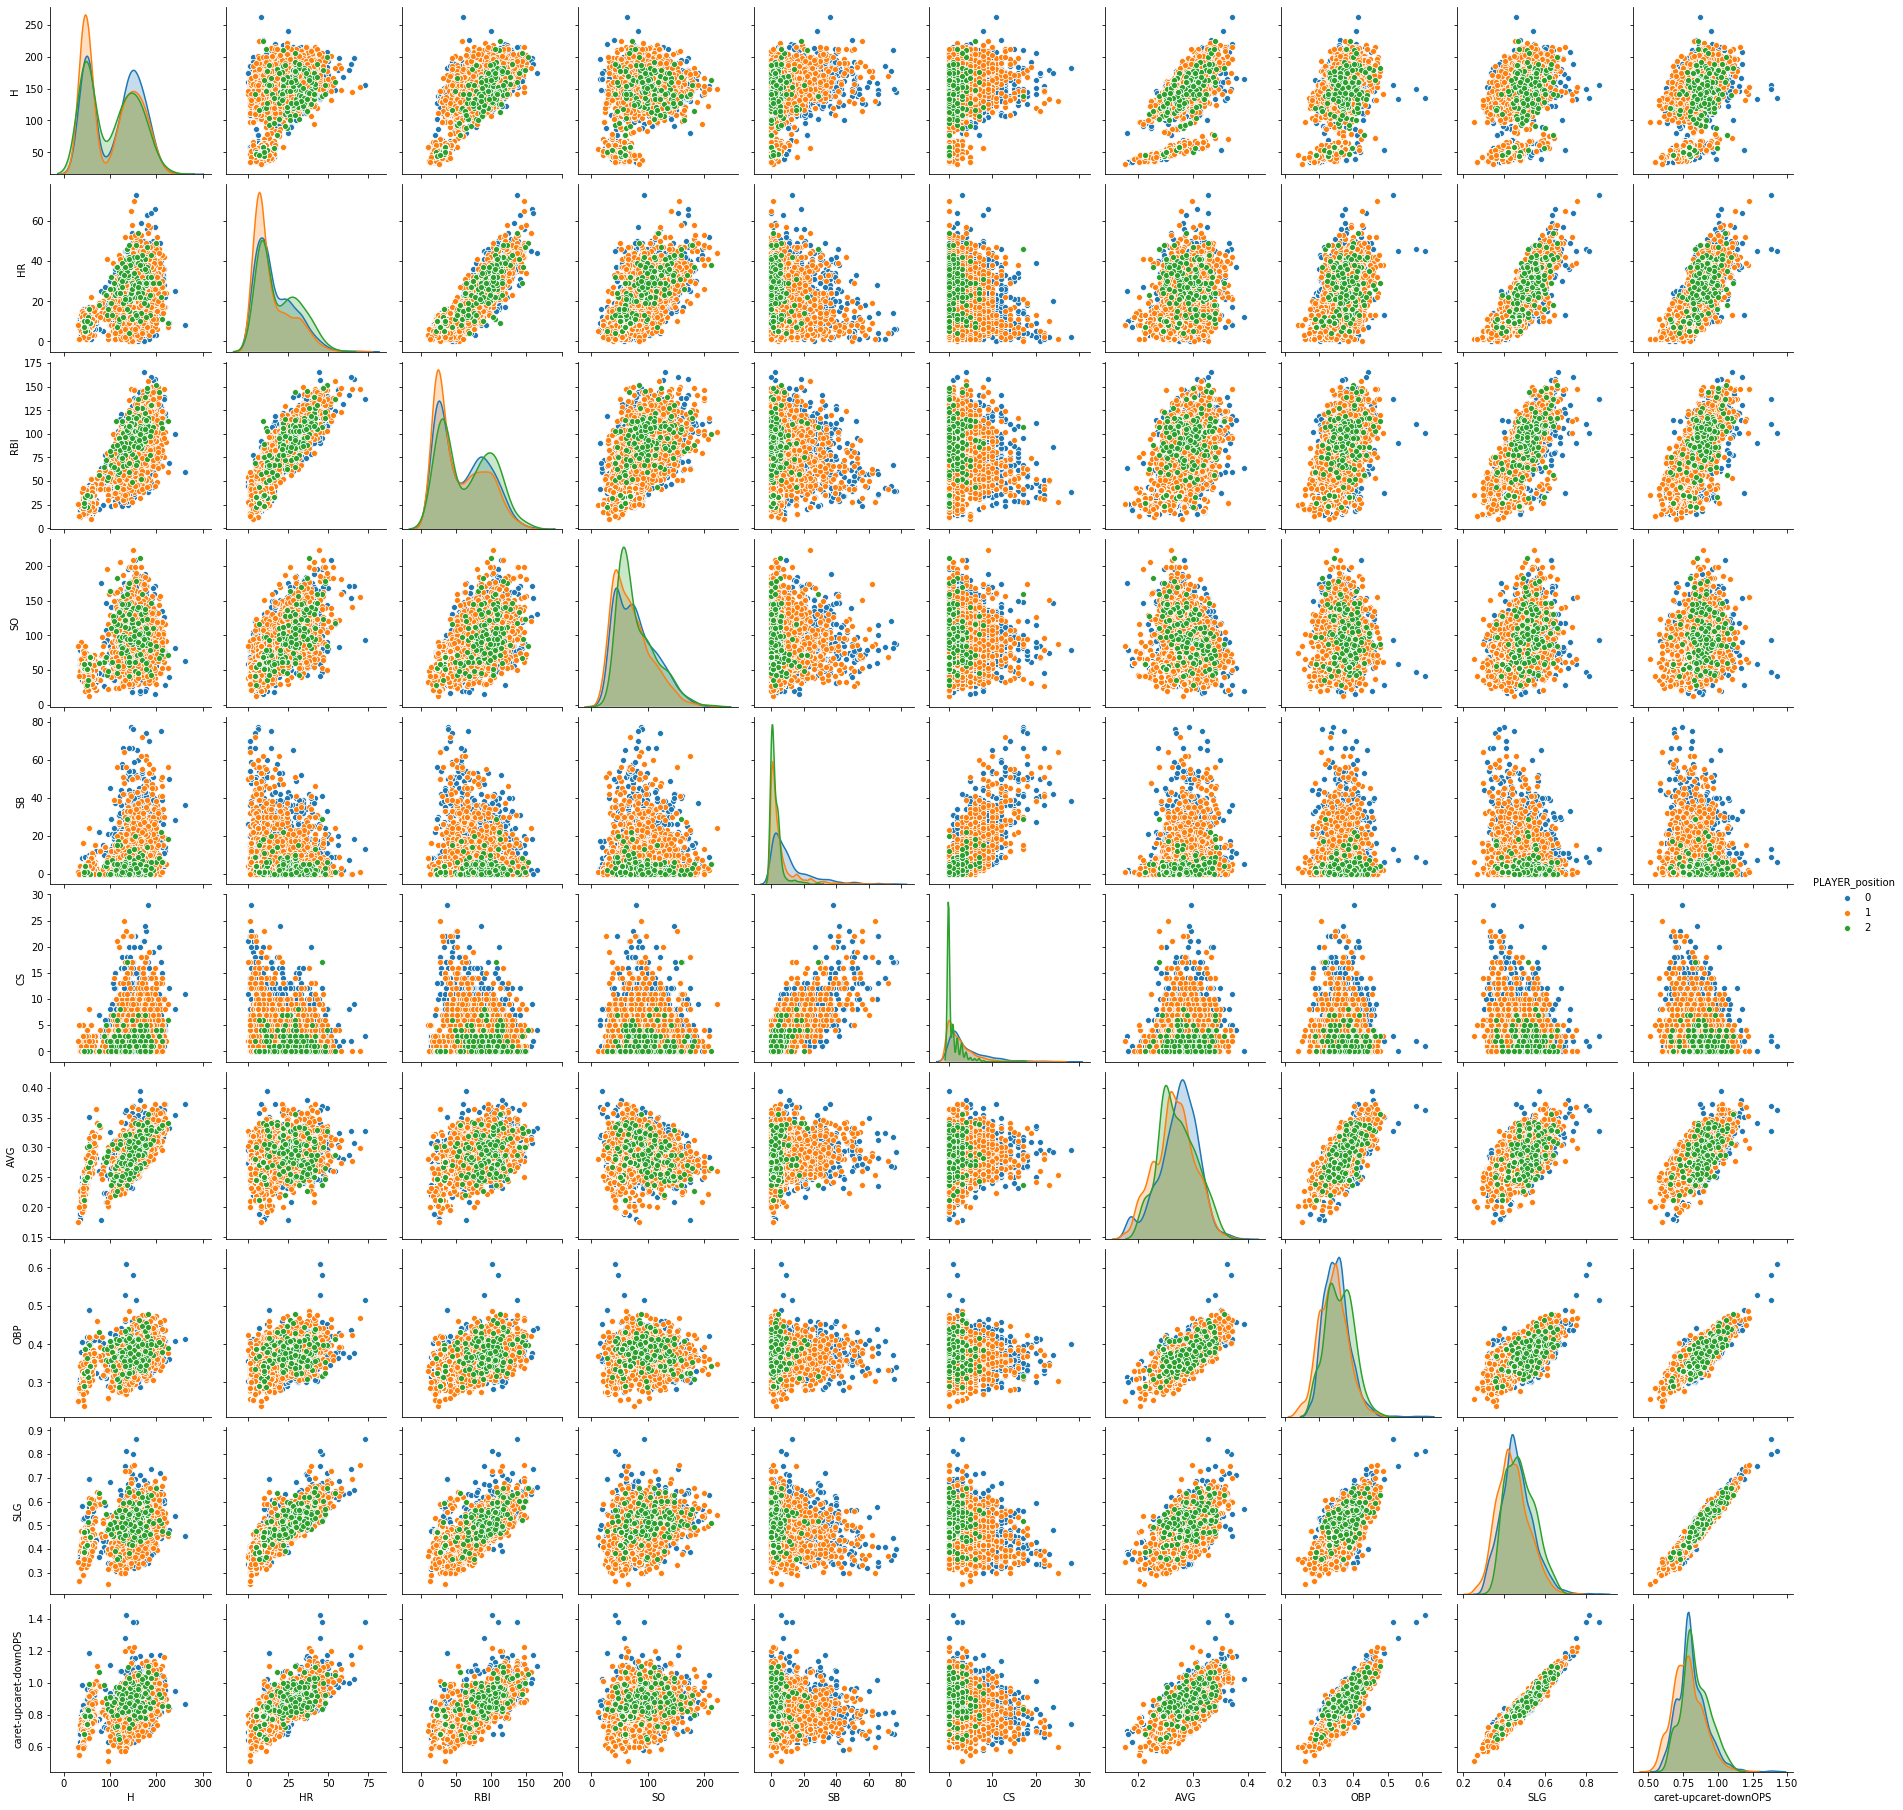

In [462]:
sns.pairplot(mlb[['H', 'HR', 'RBI','SO', 'SB', 'CS', 'AVG', 'OBP', 'SLG', 'caret-upcaret-downOPS', "PLAYER_position"]], hue = "PLAYER_position")

# 6 (Repeated). Here I am creating my X and Y variables again. I am also splitting up the data into training and testing datasets. I then scale my data.

In [363]:
#Splitting the data into independent and dependent variables
X = mlb.iloc[:,2:-2]
y = mlb.iloc[:,-2]
X["Year"] = pd.Categorical(X.Year)

In [364]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.25, random_state = 21, stratify = mlb.PLAYER_position)

In [365]:
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

# 7 (Repeated). I now fit the same models to this dataset and see which model reports the best accuracy.

### In these models, I did less hypertuning. I did all the default parameters until I have chosen the model that I want to do. Then I did some hypertuning on that model.

### First I tried KNN Classifier and found it to have a 78% accuracy.

In [367]:
knn = KNeighborsClassifier()
knn.fit(X_train2,y_train2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [368]:
yhat_knn = knn.predict(X_test2)
confusion_matrix(y_test2, yhat_knn)
print(classification_report(y_test2, yhat_knn))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72       400
           1       0.79      0.86      0.82       647
           2       0.71      0.40      0.51        60

    accuracy                           0.78      1107
   macro avg       0.75      0.65      0.69      1107
weighted avg       0.77      0.78      0.77      1107



### I then did the Gradient Boost Model and found the accuracy to be 63%

In [458]:
ac = AdaBoostClassifier()
ac.fit(X_train2, y_train2)
yhat_ac = ac.predict(X_test2)
print(classification_report(y_test2, yhat_ac))

              precision    recall  f1-score   support

           0       0.54      0.48      0.51       400
           1       0.67      0.74      0.70       647
           2       0.55      0.38      0.45        60

    accuracy                           0.63      1107
   macro avg       0.59      0.53      0.56      1107
weighted avg       0.62      0.63      0.62      1107



### Then I did Logistic Regression and found the accuracy to be 62%

In [459]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(multi_class = 'ovr', solver = 'newton-cg')
lr.fit(X_train2, y_train2)
yhat_lr = lr.predict(X_test2)
print(classification_report(y_test2, yhat_lr))

              precision    recall  f1-score   support

           0       0.58      0.33      0.42       400
           1       0.63      0.86      0.73       647
           2       0.00      0.00      0.00        60

    accuracy                           0.62      1107
   macro avg       0.41      0.40      0.38      1107
weighted avg       0.58      0.62      0.58      1107



C:\Users\bradi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Then I did Gaussian Naive Bayes Model and found the accuracy to be 53%

In [460]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train2, y_train2)
yhat_gb = gb.predict(X_test2)
print(classification_report(y_test2, yhat_gb))

              precision    recall  f1-score   support

           0       0.49      0.45      0.47       400
           1       0.66      0.60      0.63       647
           2       0.14      0.35      0.20        60

    accuracy                           0.53      1107
   macro avg       0.43      0.47      0.43      1107
weighted avg       0.57      0.53      0.55      1107



### Then I tried LInearSVC model and found the accuracy to be 62%

In [461]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()
lsvc.fit(X_train2, y_train2)
yhat_lsvc = lsvc.predict(X_test2)
print(classification_report(y_test2, yhat_lsvc))   

              precision    recall  f1-score   support

           0       0.59      0.32      0.42       400
           1       0.63      0.87      0.73       647
           2       0.00      0.00      0.00        60

    accuracy                           0.62      1107
   macro avg       0.41      0.40      0.38      1107
weighted avg       0.58      0.62      0.58      1107



C:\Users\bradi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\bradi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Finally, I did Random Forest. This is the one that I ended up choosing. So, I made sure to do some hypertuning as you will see in the next couple of cells that is now commented out. Using that information I fit my model and found that I got an accuracy of 83%

In [378]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]

n_estimators = 100
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [379]:
#rf_pipe = Pipeline(
#    [('rf', RandomForestClassifier())])
#param_grid = [{'rf__n_estimators': [100],
#              'rf__max_features':max_features,
#              'rf__max_depth':max_depth,
#              'rf__min_samples_split':min_samples_split,
#              'rf__min_samples_leaf':min_samples_leaf,
#              'rf__bootstrap':bootstrap}]
#gs = GridSearchCV(rf_pipe, param_grid)
#gs.fit(X_train2, y_train2)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                            

In [380]:
gs.best_params_

{'rf__bootstrap': True,
 'rf__max_depth': 70,
 'rf__max_features': 'auto',
 'rf__min_samples_leaf': 2,
 'rf__min_samples_split': 5,
 'rf__n_estimators': 100}

In [450]:
# Fitting Random Forest Classification to the Training set
rf = RandomForestClassifier(n_estimators = 2000, max_depth = 70, min_samples_leaf = 2, min_samples_split = 5)
rf.fit(X_train2, y_train2)
yhat_rf = rf.predict(X_test2)
print(classification_report(y_test2, yhat_rf))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       400
           1       0.82      0.90      0.86       647
           2       0.92      0.38      0.54        60

    accuracy                           0.82      1107
   macro avg       0.86      0.68      0.73      1107
weighted avg       0.83      0.82      0.82      1107



In [384]:
# Predicting the Test set results
y_pred = rf.predict(X_test2)
reversefactor = dict(zip(range(10),definitions))
y_test_vector = np.vectorize(reversefactor.get)(y_test2)
y_pred = np.vectorize(reversefactor.get)(y_pred)
# Making the Confusion Matrix
print(pd.crosstab(y_test_vector, y_pred, rownames=['Actual Positions'], colnames=['Predicted Positions']))

Predicted Positions  DH   IF   OF
Actual Positions                 
DH                   23   36    1
IF                    0  585   62
OF                    1   92  307


In [454]:
print(list(zip(X.columns, rf.feature_importances_)))


[('G', 0.051617524409861025), ('AB', 0.06616090267702562), ('R', 0.06279250388184703), ('H', 0.06400726501839613), ('2B', 0.06237513627358648), ('3B', 0.0318674590844998), ('HR', 0.04790743348845382), ('RBI', 0.05809817821937972), ('BB', 0.05497099823688917), ('SO', 0.05745084736050127), ('SB', 0.09935587260787136), ('CS', 0.06366428610026113), ('AVG', 0.06193446815909152), ('OBP', 0.06054304282551985), ('SLG', 0.06572514065990673), ('caret-upcaret-downOPS', 0.06619027628253119), ('Year', 0.025338664714378227)]


### Here is a dataframe that shows the most important features in my Random Forest model in predicting the position of the baseball player. It looks like the most important features is stolen bases, OPS, and At-Bat's

In [455]:
test = pd.DataFrame(X.columns, rf.feature_importances_).reset_index()
test.columns = ["Importance","Stat"]
test.sort_values(by = "Importance", ascending = False)

Importance                   Stat
10    0.099356                     SB
15    0.066190  caret-upcaret-downOPS
1     0.066161                     AB
14    0.065725                    SLG
3     0.064007                      H
11    0.063664                     CS
2     0.062793                      R
4     0.062375                     2B
12    0.061934                    AVG
13    0.060543                    OBP
7     0.058098                    RBI
9     0.057451                     SO
8     0.054971                     BB
0     0.051618                      G
6     0.047907                     HR
5     0.031867                     3B
16    0.025339                   Year

# 8 (Repeated). The answer to the question is again yes, we can predict a player's position based on his statistics. We can predict the player's position with an accuracy of 83%. That is pretty accurate model.

# 9. Understand and explain potential sources of bias in how your data/model answers your question of interest

### There definitely can be some bias in my data or models. I think that there is more information or statistics that we can get. I had a hard time finding the salary of each of these players in the year that they played. I felt like that could be another important feature to include. There are also lots of different baseball statistics that we can get. However, I couldn't figure out how to scrape it, so we were left with the 15 or so columns that I had.

### Another potential source of bias is how one player could show up multiple times in the dataset. So there could be some collinearity because of similar players.